### Dataset yang kami gunakan bersumber dari :
Link : https://www.kaggle.com/datasets/hopesb/student-depression-dataset/data

###Import Library

In [ ]:

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations and handling arrays
import seaborn as sns  # For creating statistical data visualizations
import matplotlib.pyplot as plt  # For general-purpose plotting
import tensorflow as tf # For building Models
from sklearn.preprocessing import StandardScaler  # For feature scaling and standardization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score  # For model evaluation metrics
from scipy.stats import zscore # For computing z-score
import warnings # For suppressing unnecessary warnings
import pickle # To save model
from sklearn.preprocessing import StandardScaler, LabelEncoder # For normalizing values and encoding
from sklearn.feature_selection import f_classif # To calculate ANOVA test values

warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'tensorflowjs'

# Import Dataset

In [5]:
df = pd.read_csv('Student Depression Dataset.csv')
df.columns = df.columns.str.strip()
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


# Exploratory Data Analysis (EDA)

In [6]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [7]:
# Checking rows and columns
df.shape

(27901, 18)

In [8]:
# Checing non-null value counts and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [9]:
# Checking column names
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [10]:
# Checking datatypes
df.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [11]:
# Unique values count
df.nunique()

id                                       27901
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             5
Family History of Mental Illness             2
Depression                                   2
dtype: int64

In [12]:
# Count of missing values
missing = df.isnull().sum()
missing

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [13]:
# Percentage of missing values
per =  (missing / len(df)) * 100
per

id                                       0.000000
Gender                                   0.000000
Age                                      0.000000
City                                     0.000000
Profession                               0.000000
Academic Pressure                        0.000000
Work Pressure                            0.000000
CGPA                                     0.000000
Study Satisfaction                       0.000000
Job Satisfaction                         0.000000
Sleep Duration                           0.000000
Dietary Habits                           0.000000
Degree                                   0.000000
Have you ever had suicidal thoughts ?    0.000000
Work/Study Hours                         0.000000
Financial Stress                         0.010752
Family History of Mental Illness         0.000000
Depression                               0.000000
dtype: float64

In [14]:
# Dropping duplicates
df = df.drop_duplicates()
df.shape

(27901, 18)

In [15]:
# Dropping unnecessary column
df = df.drop(columns=['City'])
df.head()

,id,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


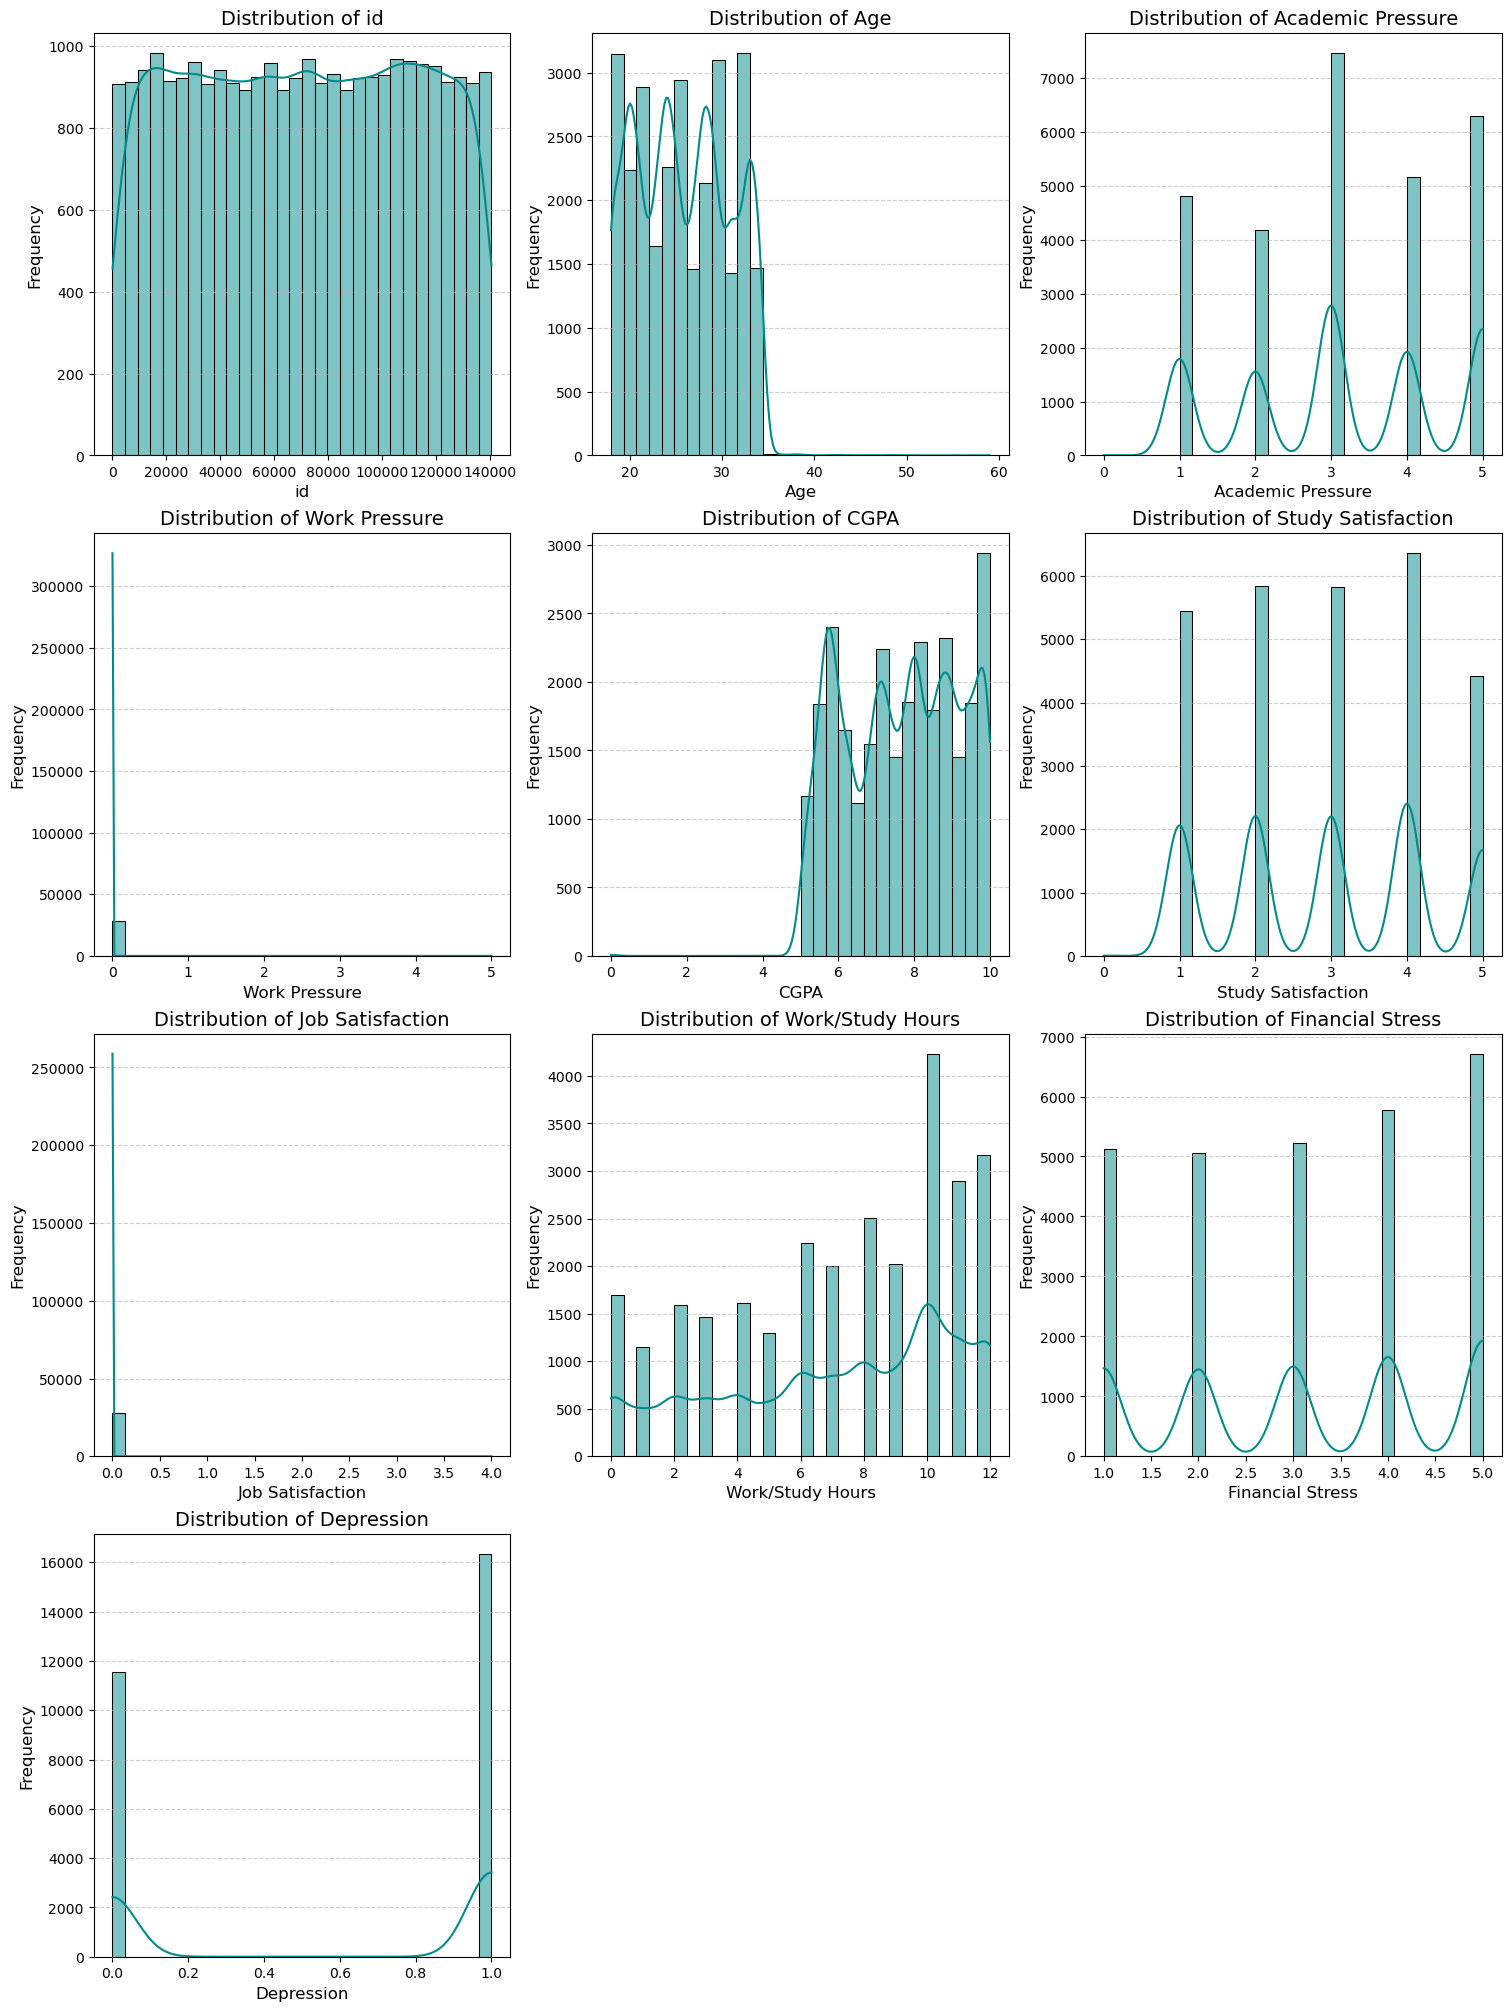

In [16]:
# Univariate Analysis: Numeric Features Distribution

numerical_columns = df.select_dtypes(include=['number']).columns

num_cols = len(numerical_columns)
cols = 3
rows = (num_cols + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), constrained_layout=True)
axes = axes.flatten()

for i, j in enumerate(numerical_columns):
    sns.histplot(df[j], kde=True, bins=30,  color='darkcyan', ax=axes[i])
    axes[i].set_title(f"Distribution of {j}", fontsize=14)
    axes[i].set_xlabel(j, fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
    axes[i].set_ylabel("Frequency", fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

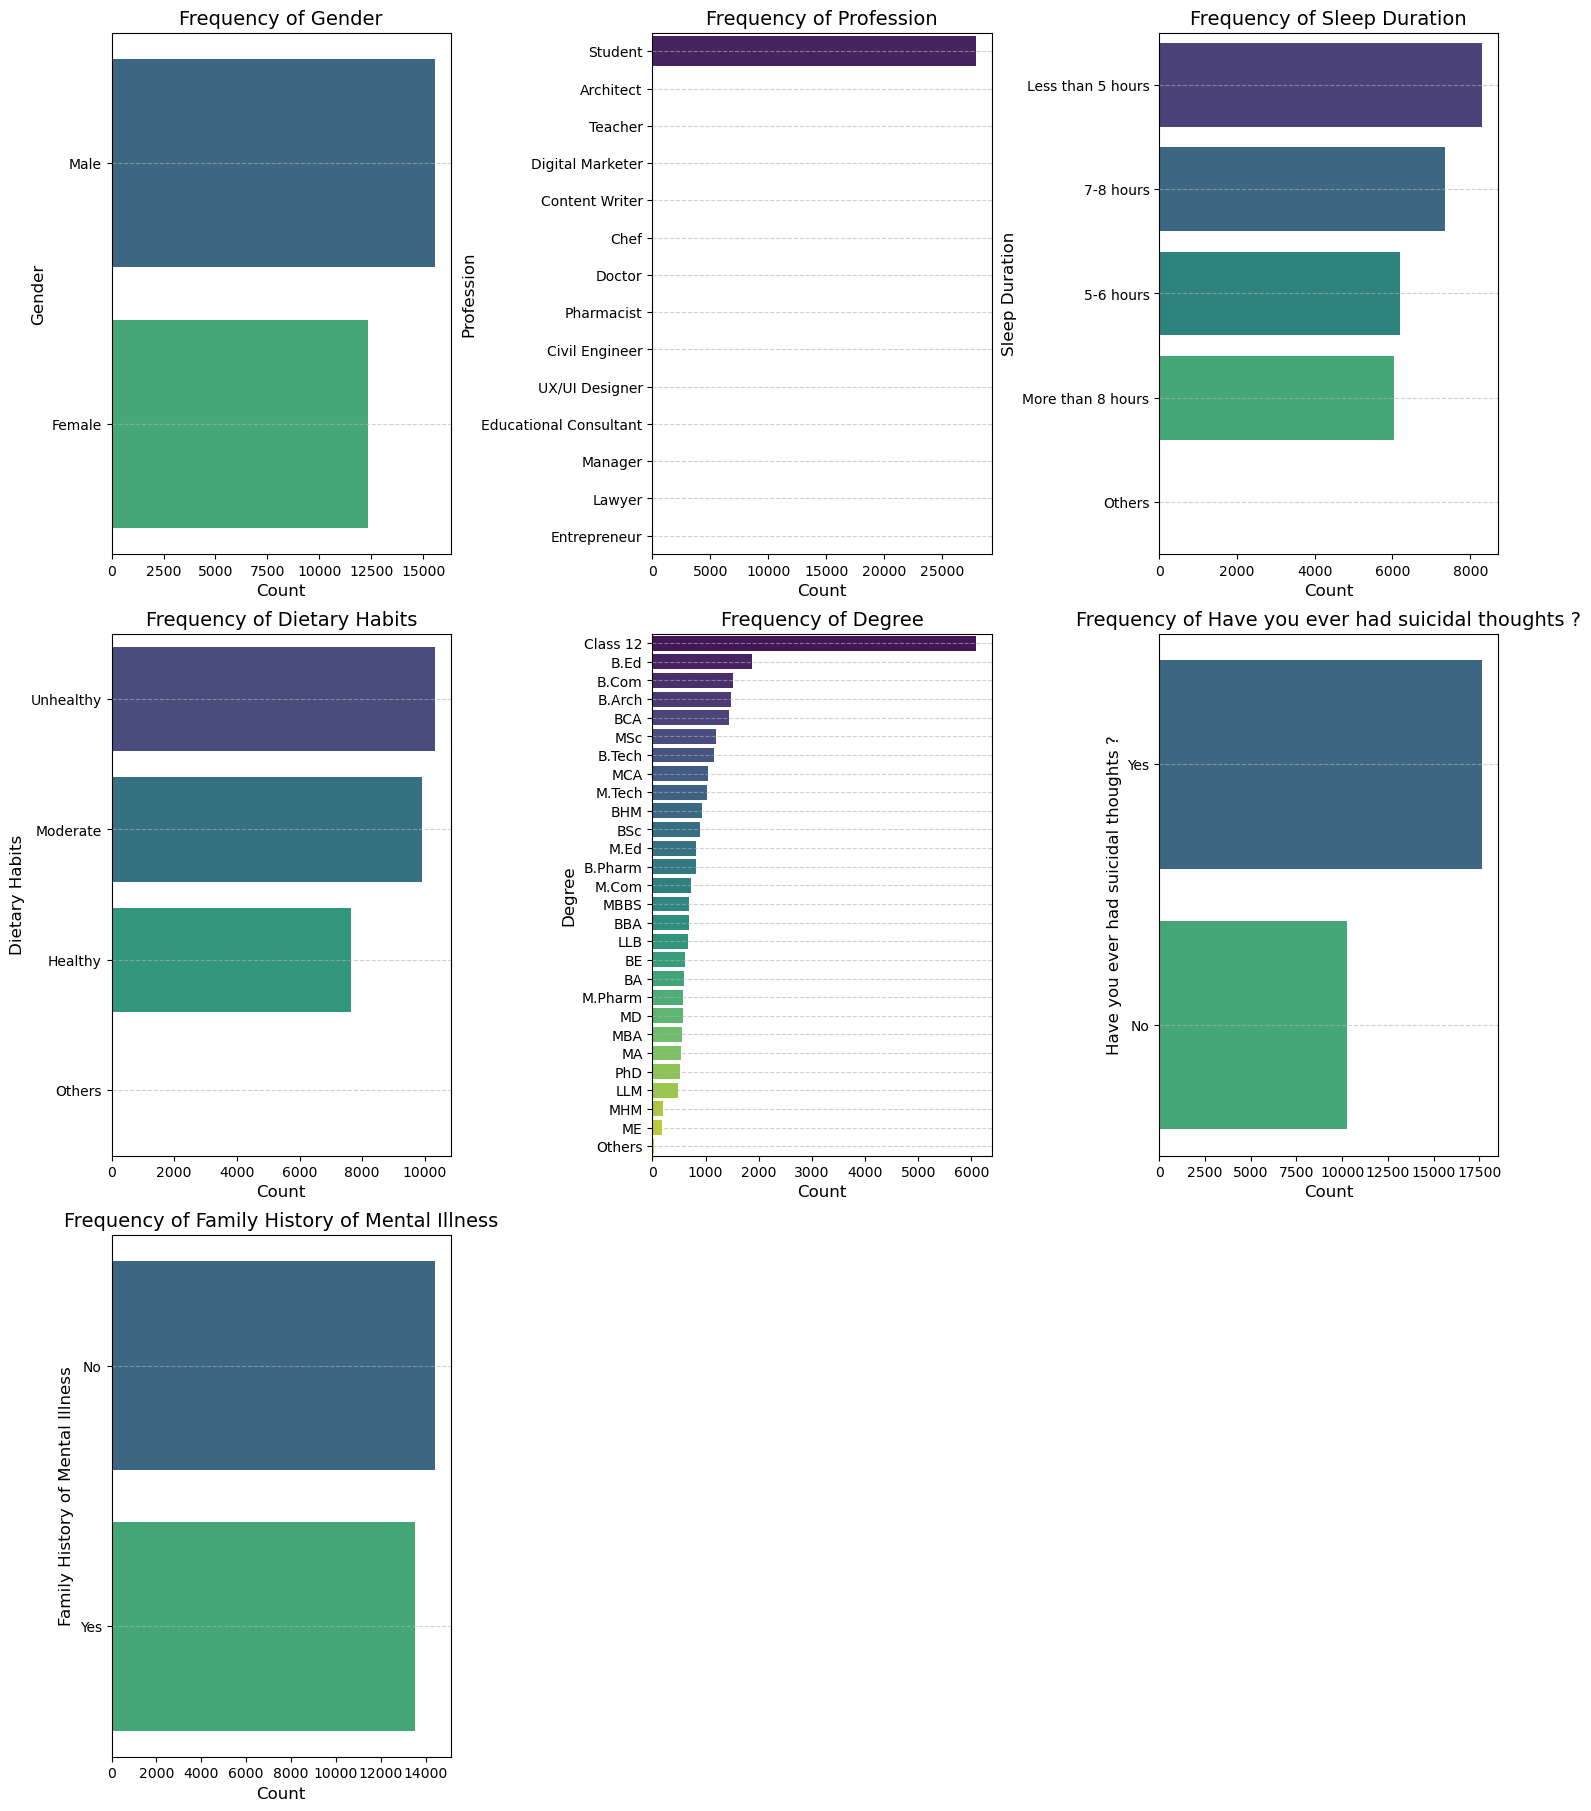

In [17]:
# Univariate Analysis: Categorical Features Distribution

categorical_columns = df.select_dtypes(include=['object']).columns

num_cols = len(categorical_columns)
cols = 3
rows = (num_cols + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 6), constrained_layout=True)
axes = axes.flatten()

for i, j in enumerate(categorical_columns):
    sns.countplot(data=df, y=j, order=df[j].value_counts().index, palette="viridis", ax=axes[i])
    axes[i].set_title(f"Frequency of {j}", fontsize=14)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
    axes[i].set_xlabel("Count", fontsize=12)
    axes[i].set_ylabel(j, fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

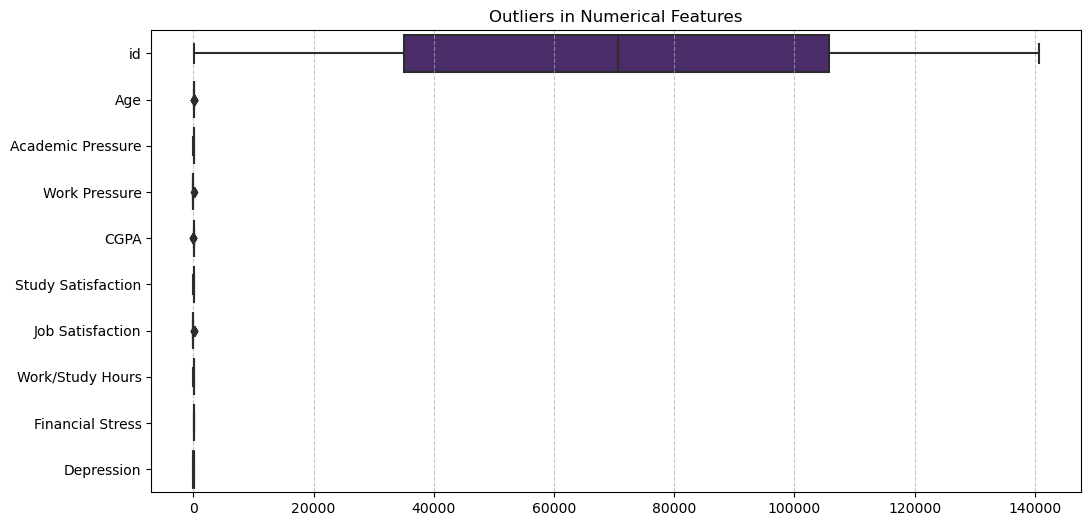

In [18]:
# Outlier Detection

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns], orient='h', palette='viridis')

plt.title('Outliers in Numerical Features')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

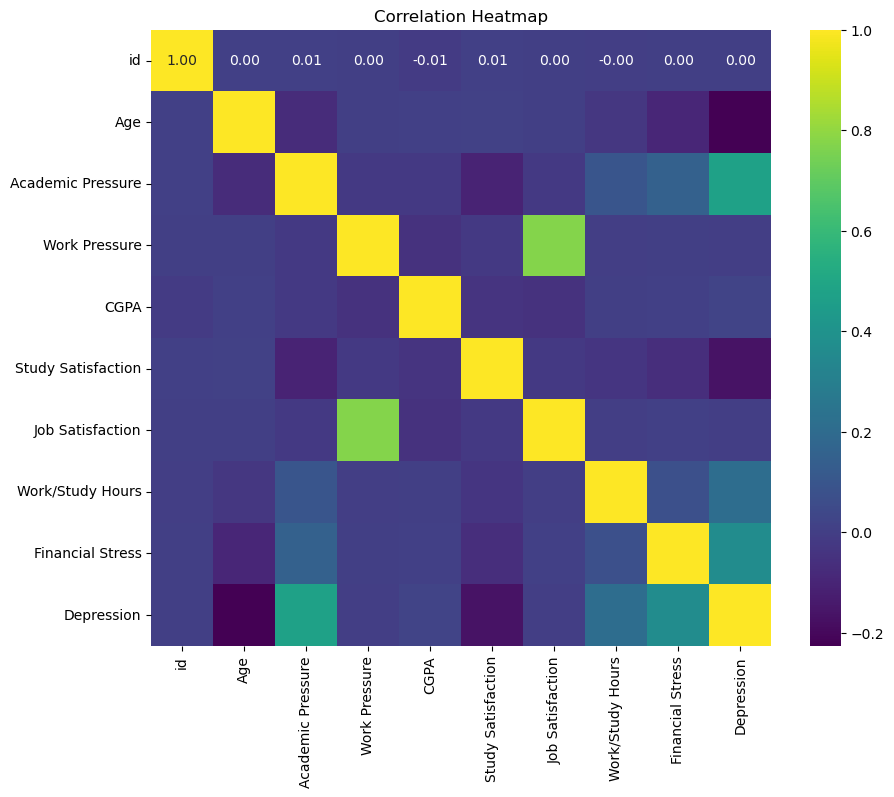

In [19]:
# Correlation Analysis

numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

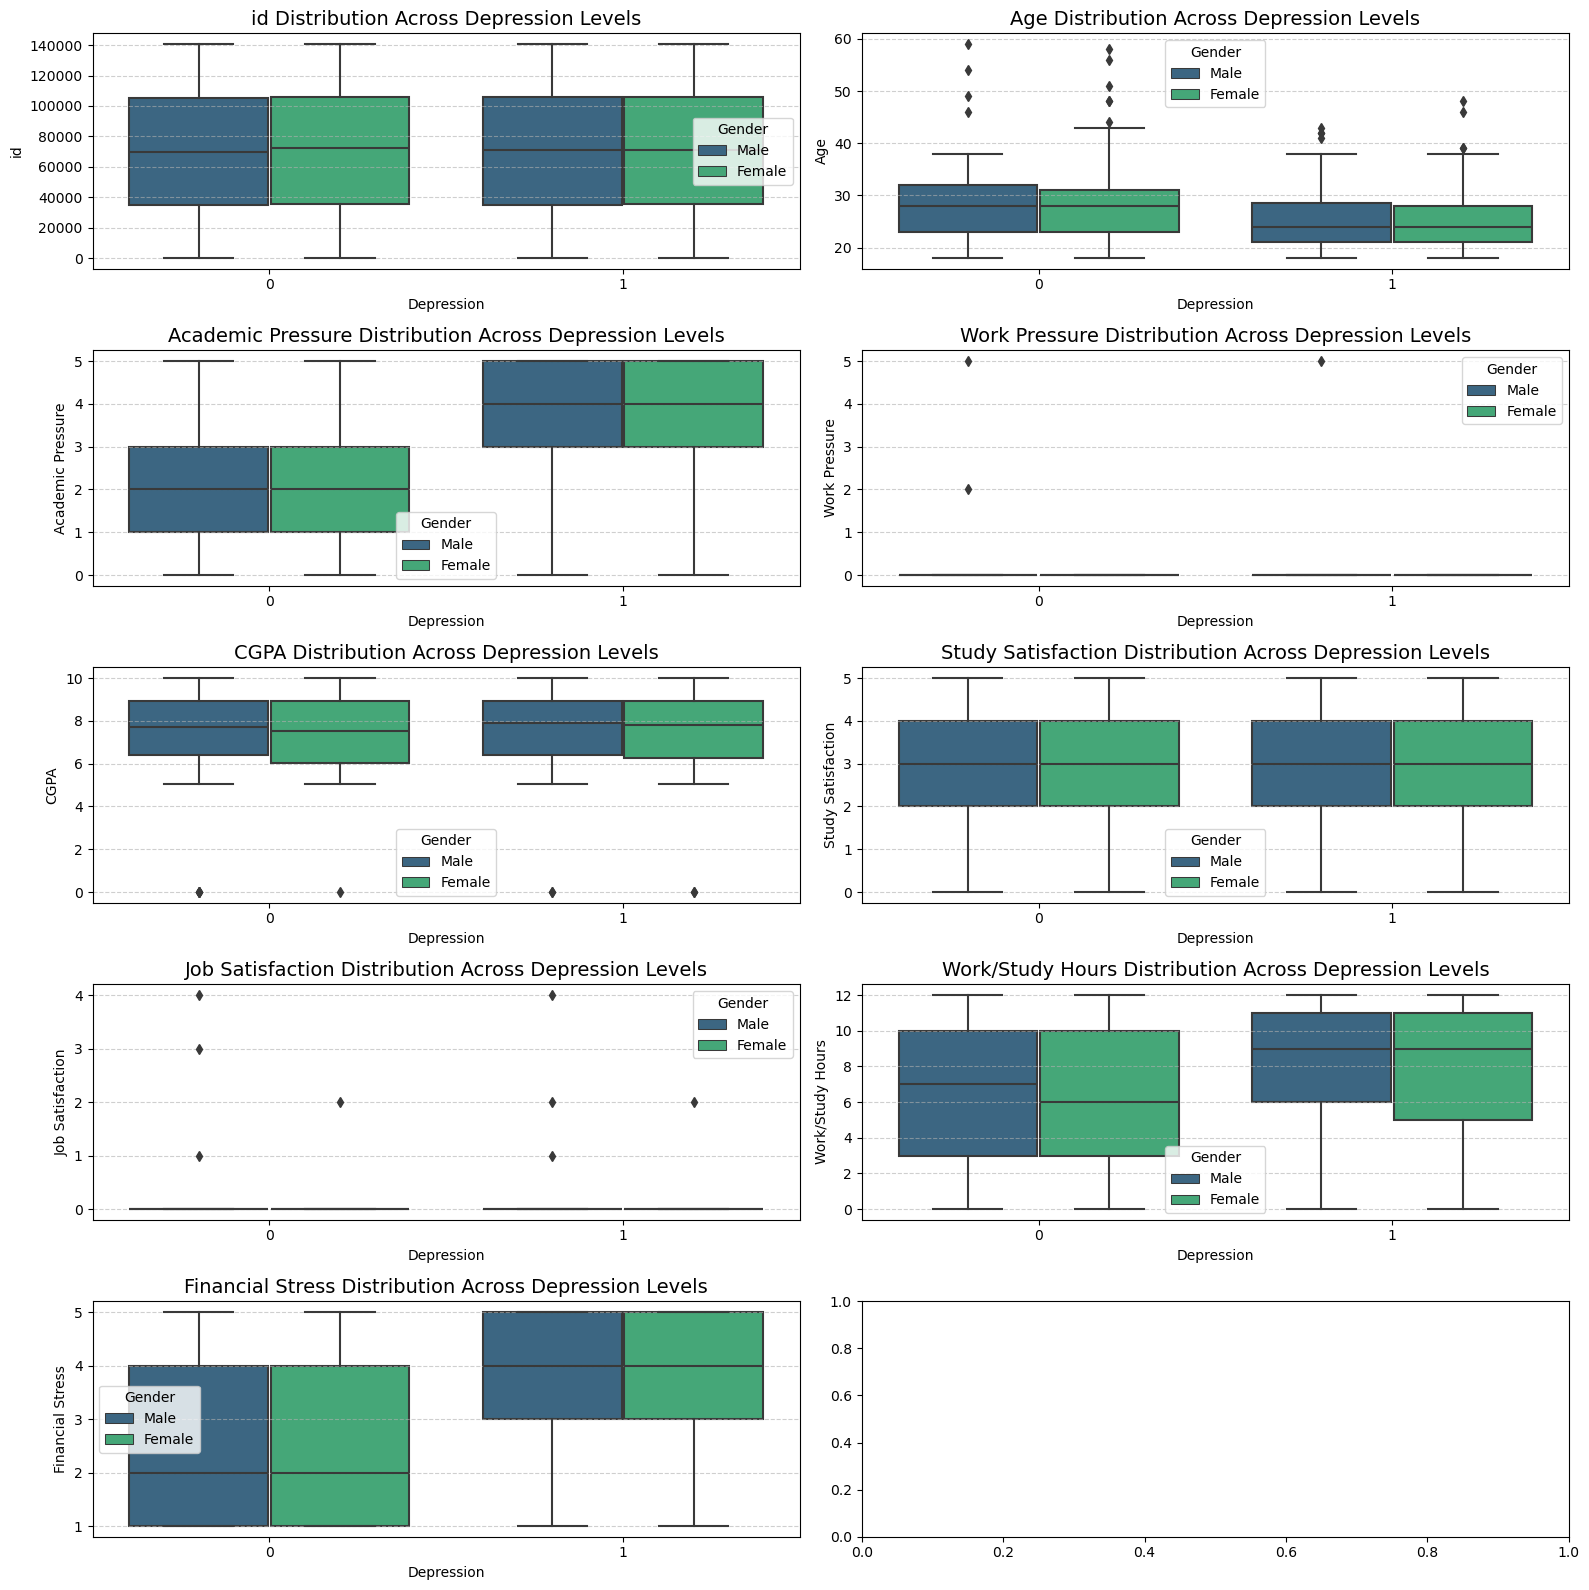

In [20]:
# Bivariate Analysis: Numerical Feature Distribution

n_cols = 2
n_rows = 5

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 16))
axes = axes.flatten()

for i, j in enumerate([col for col in numerical_columns if col != 'Depression']):
    sns.boxplot(x='Depression', y=j, data=df, hue='Gender', palette='viridis', ax=axes[i])
    axes[i].set_title(f'{j} Distribution Across Depression Levels', fontsize=14)
    axes[i].set_xlabel('Depression')
    axes[i].set_ylabel(j)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [21]:
# Grouped Aggregations

# Gender level
gender = df.groupby('Gender')[numerical_columns].mean().sort_values(by='Depression', ascending=False)
gender

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
Gender,,,,,,,,,,
Male,70268.793015,25.861967,3.113848,0.000772,7.703352,2.924680,0.000965,7.199974,3.132832,0.586287
Female,70660.311316,25.772381,3.175652,0.000000,7.596645,2.967946,0.000324,7.102882,3.148721,0.584507


In [22]:
# Suicidal thoughts level
suicide = df.groupby('Have you ever had suicidal thoughts ?')[numerical_columns].mean().sort_values(by='Depression', ascending=False)
suicide

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
Have you ever had suicidal thoughts ?,,,,,,,,,,
Yes,70588.313095,25.398165,3.416402,0.000396,7.66564,2.857272,0.000566,7.499604,3.368826,0.790496
No,70190.254270,26.553245,2.666959,0.000488,7.63967,3.093021,0.000878,6.566520,2.745167,0.232211


# Preprocessing

### MISSING VALUE HANDLING

In [23]:
df['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].median())
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [24]:
# Getting unique values
for i in categorical_columns:
    print(f"Column: {i}")
    print(df[i].unique())
    print("-" * 50)

Column: Gender
['Male' 'Female']
--------------------------------------------------
Column: Profession
['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
--------------------------------------------------
Column: Sleep Duration
['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours' 'Others']
--------------------------------------------------
Column: Dietary Habits
['Healthy' 'Moderate' 'Unhealthy' 'Others']
--------------------------------------------------
Column: Degree
['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' 'Class 12' 'B.Ed' 'LLB' 'BE'
 'M.Ed' 'MSc' 'BHM' 'M.Pharm' 'MCA' 'MA' 'B.Com' 'MD' 'MBA' 'MBBS' 'M.Com'
 'B.Arch' 'LLM' 'B.Tech' 'BBA' 'ME' 'MHM' 'Others']
--------------------------------------------------
Column: Have you ever had suicidal thoughts ?
['Yes' 'No']
--------------------------------------------------
Column: Fa

### HANDLING OF CATEGORYCAL COLUMN (Binary and Ordinal)

### Binary Classification

In [25]:
# Binary Classification
binary = ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for i in binary:
    df[i] = df[i].map({'Yes': 1, 'No': 0})
df.head()

,id,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,1,3.0,1.0,0,1
1,8,Female,24.0,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,0,3.0,2.0,1,0
2,26,Male,31.0,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,0,9.0,1.0,1,0
3,30,Female,28.0,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,1,4.0,5.0,1,1
4,32,Female,25.0,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,1,1.0,1.0,0,0


### Ordinal Classification

In [26]:
# Ordinal Classification
ordinal = {
    'Sleep Duration': {'Less than 5 hours': 1, '5-6 hours': 2, '7-8 hours': 3, 'More than 8 hours': 4, 'Others': 0},
    'Dietary Habits': {'Unhealthy': 1, 'Moderate': 2, 'Healthy': 3, 'Others': 0}
}

for i, j in ordinal.items():
    df[i] = df[i].map(j)
df.head()

,id,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Student,5.0,0.0,8.97,2.0,0.0,2,3,B.Pharm,1,3.0,1.0,0,1
1,8,Female,24.0,Student,2.0,0.0,5.90,5.0,0.0,2,2,BSc,0,3.0,2.0,1,0
2,26,Male,31.0,Student,3.0,0.0,7.03,5.0,0.0,1,3,BA,0,9.0,1.0,1,0
3,30,Female,28.0,Student,3.0,0.0,5.59,2.0,0.0,3,2,BCA,1,4.0,5.0,1,1
4,32,Female,25.0,Student,4.0,0.0,8.13,3.0,0.0,2,2,M.Tech,1,1.0,1.0,0,0


In [27]:
df = df.drop(columns =  ['Gender'])
df.shape

(27901, 16)

In [28]:
df.head()

,id,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,33.0,Student,5.0,0.0,8.97,2.0,0.0,2,3,B.Pharm,1,3.0,1.0,0,1
1,8,24.0,Student,2.0,0.0,5.90,5.0,0.0,2,2,BSc,0,3.0,2.0,1,0
2,26,31.0,Student,3.0,0.0,7.03,5.0,0.0,1,3,BA,0,9.0,1.0,1,0
3,30,28.0,Student,3.0,0.0,5.59,2.0,0.0,3,2,BCA,1,4.0,5.0,1,1
4,32,25.0,Student,4.0,0.0,8.13,3.0,0.0,2,2,M.Tech,1,1.0,1.0,0,0


## Normalization

NORMALISASI CGPA ke skala 1-4

In [29]:
# Change CGPA to 1-4 Scale

# Fungsi normalisasi Min-Max
def min_max_scaling(data, new_min, new_max):
    return (data - data.min()) / (data.max() - data.min()) * (new_max - new_min) + new_min

# Penerapan
df['CGPA'] = min_max_scaling(df['CGPA'], 1, 4)
df.head()

,id,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,33.0,Student,5.0,0.0,3.691,2.0,0.0,2,3,B.Pharm,1,3.0,1.0,0,1
1,8,24.0,Student,2.0,0.0,2.770,5.0,0.0,2,2,BSc,0,3.0,2.0,1,0
2,26,31.0,Student,3.0,0.0,3.109,5.0,0.0,1,3,BA,0,9.0,1.0,1,0
3,30,28.0,Student,3.0,0.0,2.677,2.0,0.0,3,2,BCA,1,4.0,5.0,1,1
4,32,25.0,Student,4.0,0.0,3.439,3.0,0.0,2,2,M.Tech,1,1.0,1.0,0,0


### Handlling Outliers

In [30]:
# Handling Outliers

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)

#Compute Z-scores
z_scores = df[numerical_cols].apply(zscore)
print('-'*50)
print(df.shape)

# Filter the dataframe based on Z-scores
df_filtered = df[(z_scores < 3).all(axis=1)]

# Prepare features (X) and target (y)
X = df_filtered.drop(columns=['Depression'])  # Drop the target column for features
y = df_filtered['Depression']
print(X.shape)

Index(['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')
--------------------------------------------------
(27901, 16)
(27874, 15)


### Data Splitting

In [31]:
# Memisahkan fitur (X) dan target (y)
X = df_filtered.drop(columns=['Depression', 'Profession', 'Degree'])
y = df_filtered['Depression']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Doing ANOVA Test to check importance of retained features

F_values, p_values = f_classif(X, y)
print(pd.Series(F_values, index=X.columns))

id                                           0.006039
Age                                       1500.388913
Academic Pressure                         8129.177394
Work Pressure                                     NaN
CGPA                                        14.181651
Study Satisfaction                         812.027197
Job Satisfaction                                  NaN
Sleep Duration                             209.819432
Dietary Habits                            1245.008921
Have you ever had suicidal thoughts ?    11883.506643
Work/Study Hours                          1262.314080
Financial Stress                          4253.222307
Family History of Mental Illness            80.389191
dtype: float64


### Feature Scalling

In [33]:
# Scaling Fitur
# Penting: scaler di-fit HANYA pada data latih untuk mencegah kebocoran data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Menampilkan bentuk data setelah di-split dan di-scale
print("Bentuk X_train_scaled:", X_train_scaled.shape)
print("Bentuk X_test_scaled:", X_test_scaled.shape)

Bentuk X_train_scaled: (22299, 13)
Bentuk X_test_scaled: (5575, 13)


In [34]:
# Prepare features (X) and target (y)
# Drop non-numeric columns before splitting
X = df_filtered.drop(columns=['Depression', 'Profession', 'Degree'])  # Drop the target and non-numeric columns for features
y = df_filtered['Depression']
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(27874, 13)


# Modelling

In [35]:
# Membangun arsitektur model Neural Network
model = tf.keras.models.Sequential([
    # Input layer dengan bentuk sesuai jumlah fitur
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),

    # Hidden layer pertama dengan 32 neuron dan fungsi aktivasi ReLU
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3), # Dropout untuk mencegah overfitting

    # Hidden layer kedua dengan 16 neuron
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.3),

    # Output layer dengan 1 neuron dan fungsi aktivasi sigmoid untuk klasifikasi biner
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Menampilkan ringkasan arsitektur model
model.summary()

# Meng-compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 993 (3.88 KB)

 Trainable params: 993 (3.88 KB)

 Non-trainable params: 0 (0.00 B)

## Model Train

In [36]:
# Melatih model dengan data latih
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=50, # Jumlah iterasi pelatihan
    batch_size=32,
    validation_data=(X_test_scaled, y_test), # Data validasi untuk memantau performa
    verbose=2
)

Epoch 1/50
697/697 - 3s - 5ms/step - accuracy: 0.7964 - loss: 0.4454 - val_accuracy: 0.8484 - val_loss: 0.3523
Epoch 2/50
697/697 - 1s - 2ms/step - accuracy: 0.8360 - loss: 0.3896 - val_accuracy: 0.8497 - val_loss: 0.3459
Epoch 3/50
697/697 - 1s - 2ms/step - accuracy: 0.8402 - loss: 0.3812 - val_accuracy: 0.8495 - val_loss: 0.3463
Epoch 4/50
697/697 - 1s - 2ms/step - accuracy: 0.8438 - loss: 0.3758 - val_accuracy: 0.8483 - val_loss: 0.3454
Epoch 5/50
697/697 - 1s - 2ms/step - accuracy: 0.8451 - loss: 0.3756 - val_accuracy: 0.8477 - val_loss: 0.3449
Epoch 6/50
697/697 - 1s - 2ms/step - accuracy: 0.8452 - loss: 0.3732 - val_accuracy: 0.8484 - val_loss: 0.3454
Epoch 7/50
697/697 - 1s - 2ms/step - accuracy: 0.8441 - loss: 0.3721 - val_accuracy: 0.8484 - val_loss: 0.3442
Epoch 8/50
697/697 - 1s - 2ms/step - accuracy: 0.8443 - loss: 0.3723 - val_accuracy: 0.8490 - val_loss: 0.3444
Epoch 9/50
697/697 - 1s - 2ms/step - accuracy: 0.8456 - loss: 0.3693 - val_accuracy: 0.8484 - val_loss: 0.3446
E

## Model Evaluation

In [37]:
# Evaluasi model pada data uji
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")
print(f"Test Loss: {loss:.4f}")

# Membuat prediksi
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int).flatten() # Konversi probabilitas ke kelas 0 atau 1

# Menampilkan laporan evaluasi lengkap
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))
print("Matriks Konfusi:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8515 - loss: 0.3491

Test Accuracy: 85.11%
Test Loss: 0.3451
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82      2342
           1       0.86      0.89      0.87      3233

    accuracy                           0.85      5575
   macro avg       0.85      0.84      0.85      5575
weighted avg       0.85      0.85      0.85      5575

Matriks Konfusi:
 [[1875  467]
 [ 363 2870]]
ROC AUC Score: 0.8441590816100932


### Import and Save Model

In [38]:
import pickle

# Setelah Anda membuat dan melatih scaler
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Simpan objek scaler ke dalam sebuah file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Objek StandardScaler berhasil disimpan ke scaler.pkl")

Objek StandardScaler berhasil disimpan ke scaler.pkl


In [39]:
# Save the trained model
model.save('best_model.keras')
print("Model Keras berhasil disimpan sebagai best_model.keras")

Model Keras berhasil disimpan sebagai best_model.keras


In [40]:
import tensorflow as tf
import pickle
import pandas as pd
import numpy as np

# --- Memuat Artefak yang Dibutuhkan ---

# 1. Muat model Keras yang tersimpan (Cara yang direkomendasikan)
model = tf.keras.models.load_model('best_model.keras')
print("Model Keras berhasil dimuat.")

# 2. Muat scaler dari file .pkl
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)
print("Objek StandardScaler berhasil dimuat dari scaler.pkl")

# --- Melakukan Prediksi ---

# Anda juga perlu daftar kolom asli untuk membuat DataFrame yang benar
# Anda bisa menyimpannya secara manual atau dari X.columns saat training
original_columns = ['gender', 'age', 'scholarship', 'type_of_course', 'financial_condition', 'social_relations'] # ISI DENGAN SEMUA KOLOM FITUR ANDA

def predict_depression(new_data, model, scaler, columns):
    """Fungsi inferensi yang menggunakan model & scaler yang dimuat."""
    new_df = pd.DataFrame([new_data])
    new_df_encoded = pd.get_dummies(new_df).reindex(columns=columns, fill_value=0)
    new_data_scaled = scaler.transform(new_df_encoded)

    prediction = model.predict(new_data_scaled)

    if prediction[0][0] > 0.5:
        return f"Terindikasi Depresi (Probabilitas: {prediction[0][0]*100:.2f}%)"
    else:
        return f"Tidak Terindikasi Depresi (Probabilitas: {prediction[0][0]*100:.2f}%)"

# Contoh data baru (pastikan semua kolom terisi)
sample_data = {
    'gender': 'Female', 'age': 20, 'scholarship': 'No',
    'type_of_course': 'In person', 'financial_condition': 'Average', 'social_relations': 'Good'
    # ... isi fitur lainnya
}

# Lakukan prediksi (setelah sample_data dilengkapi)
# result = predict_depression(sample_data, model, scaler, original_columns)
# print(result)

Model Keras berhasil dimuat.
Objek StandardScaler berhasil dimuat dari scaler.pkl


In [41]:
# 'model' adalah variabel model Anda yang sudah dilatih
model.save("model_predict.h5")

print("Model berhasil disimpan dalam format .h5")

Model berhasil disimpan dalam format .h5


In [46]:
%pip install tensorflow

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Tentukan path untuk menyimpan model .h5
model_path_h5 = 'best_predict.keras'

# Buat callback ModelCheckpoint dengan nama file .h5
# Perhatikan bahwa kita hanya mengubah nama file di sini
checkpoint_h5 = ModelCheckpoint(
    filepath=model_path_h5,
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

# Anda juga bisa tetap menggunakan EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Jalankan proses training dengan callback yang baru
# history = model.fit(
#     X_train_scaled, y_train,
#     epochs=100,
#     batch_size=32,
#     validation_data=(X_test_scaled, y_test),
#     callbacks=[checkpoint_h5, early_stopping]
# )

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Inferensi Sederhana

In [47]:
final_features_order_for_inference = X.columns.tolist()
print("\nUrutan fitur yang digunakan untuk melatih model:", final_features_order_for_inference)

def predict_depression_from_new_data(new_raw_data, model_loaded, scaler_loaded, features_order):
    """
    Fungsi inferensi yang menggunakan model & scaler yang dimuat.
    Menerima data baru dalam bentuk dictionary dan mengembalikan prediksi.
    """
    # Definisi pemetaan harus ada dalam scope fungsi ini jika tidak global
    binary_map = {'Yes': 1, 'No': 0}
    ordinal_map_sleep = {'Less than 5 hours': 1, '5-6 hours': 2, '7-8 hours': 3, 'More than 8 hours': 4, 'Others': 0}
    ordinal_map_dietary = {'Unhealthy': 1, 'Moderate': 2, 'Healthy': 3, 'Others': 0}

    # Asumsi min/max CGPA ASLI (skala 0-10) dari dataset pelatihan
    # Anda harus mendapatkan nilai-nilai ini dari df ASLI sebelum penskalaan dan pemfilteran outlier.
    # Contoh (gunakan nilai dari df asli Anda):
    original_cgpa_min_val_df = 0.0  # Min CGPA dari dataset asli (sebelum scaling 1-4)
    original_cgpa_max_val_df = 10.0 # Max CGPA dari dataset asli (sebelum scaling 1-4)

    # 1. Konversi data input mentah ke DataFrame
    new_df = pd.DataFrame([new_raw_data])

    # 2. Terapkan pemetaan ordinal
    new_df['Sleep Duration'] = new_df['Sleep Duration'].map(ordinal_map_sleep)
    new_df['Dietary Habits'] = new_df['Dietary Habits'].map(ordinal_map_dietary)

    # 3. Terapkan pemetaan binary
    new_df['Have you ever had suicidal thoughts ?'] = new_df['Have you ever had suicidal thoughts ?'].map(binary_map)
    new_df['Family History of Mental Illness'] = new_df['Family History of Mental Illness'].map(binary_map)

    # 4. Normalisasi CGPA ke skala 1-4
    if 'CGPA' in new_df.columns:
        # PENTING: Gunakan min/max dari CGPA ASLI (0-10) saat pra-pemrosesan data pelatihan
        # untuk bisa melakukan scaling yang konsisten di sini.
        new_df['CGPA'] = (new_df['CGPA'] - original_cgpa_min_val_df) / (original_cgpa_max_val_df - original_cgpa_min_val_df) * (4 - 1) + 1

    # 5. One-Hot Encoding untuk kolom kategorikal yang tersisa
    # Karena 'Profession' dan 'Degree' dihapus dari X sebelum One-Hot Encoding,
    # kita tidak perlu khawatir tentang One-Hot Encoding untuk kolom-kolom tersebut di sini
    # kecuali jika Anda memutuskan untuk menyertakannya kembali di X_train.
    # Jika Anda menyertakan 'Profession' dan 'Degree' di X_train,
    # Anda perlu meng-One-Hot Encode-nya di sini dan memastikan nama kolom dummy konsisten.

    # Untuk contoh ini, kita akan mengasumsikan tidak ada kolom kategorikal lain yang di-OHE.
    # Jika ada, contohnya:
    # new_df = pd.get_dummies(new_df, columns=['Kolom_Kategorikal_Lain'], drop_first=True)

    # 6. Reindex DataFrame agar sesuai dengan urutan dan kolom fitur yang digunakan saat melatih model
    new_df_processed = new_df.reindex(columns=features_order, fill_value=0)

    # 7. Scaling data baru
    new_data_scaled = scaler_loaded.transform(new_df_processed)

    # 8. Prediksi
    prediction = model_loaded.predict(new_data_scaled, verbose=0) # verbose=0 untuk menekan output loading bar

    if prediction[0][0] > 0.5:
        return f"Terindikasi Depresi (Probabilitas: {prediction[0][0]*100:.2f}%)"
    else:
        return f"Tidak Terindikasi Depresi (Probabilitas: {prediction[0][0]*100:.2f}%)"

# Contoh penggunaan fungsi inferensi:
# Data baru untuk prediksi
# Pastikan semua fitur yang *tidak dihapus* dari DataFrame saat pelatihan ada di sini.
# Kolom 'Profession' dan 'Degree' TIDAK boleh ada di sini karena Anda menghapusnya dari `X`.
sample_data_cleaned = {
    'Age': 22.0,
    'Academic Pressure': 3.0,
    'Work Pressure': 0.0,
    'CGPA': 7.5,  # Input CGPA dalam skala 0-10 (akan diskalakan oleh fungsi inferensi)
    'Study Satisfaction': 4.0,
    'Job Satisfaction': 0.0,
    'Sleep Duration': '7-8 hours', # Akan dipetakan ke numerik oleh fungsi
    'Dietary Habits': 'Healthy',   # Akan dipetakan ke numerik oleh fungsi
    'Have you ever had suicidal thoughts ?': 'No', # Akan dipetakan ke binary oleh fungsi
    'Work/Study Hours': 6.0,
    'Financial Stress': 2.0,
    'Family History of Mental Illness': 'No' # Akan dipetakan ke binary oleh fungsi
}

# Lakukan prediksi
result = predict_depression_from_new_data(sample_data_cleaned, model, scaler, final_features_order_for_inference)
print("\nHasil Prediksi untuk data baru:")
print(result)


Urutan fitur yang digunakan untuk melatih model: ['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness']

Hasil Prediksi untuk data baru:
Tidak Terindikasi Depresi (Probabilitas: 10.77%)


UsageError: Line magic function `%\env\Scripts\activate` not found.
